Dimensions du DataFrame : (3635, 1)
Types de données :
ds,yhat,yhat_lower,yhat_upper    object
dtype: object
Valeurs manquantes par colonne :
ds,yhat,yhat_lower,yhat_upper    0
dtype: int64
Valeurs manquantes après nettoyage :
ds,yhat,yhat_lower,yhat_upper    0
dtype: int64
Colonnes catégorielles : Index(['ds,yhat,yhat_lower,yhat_upper'], dtype='object')
Colonnes après One-Hot Encoding : Index(['ds,yhat,yhat_lower,yhat_upper_2007-12-10,8.836873119563045,8.243164084063485,9.521297027282388',
       'ds,yhat,yhat_lower,yhat_upper_2007-12-11,8.585458782090786,7.9518765997700935,9.248536799959753',
       'ds,yhat,yhat_lower,yhat_upper_2007-12-12,8.38137205120713,7.797213955105276,9.039564437181685',
       'ds,yhat,yhat_lower,yhat_upper_2007-12-13,8.359298284617724,7.733458004596467,8.988382315039392',
       'ds,yhat,yhat_lower,yhat_upper_2007-12-14,8.34736545895347,7.759626005153007,8.964517482258644',
       'ds,yhat,yhat_lower,yhat_upper_2007-12-15,8.092717317951225,7.466659979576816,

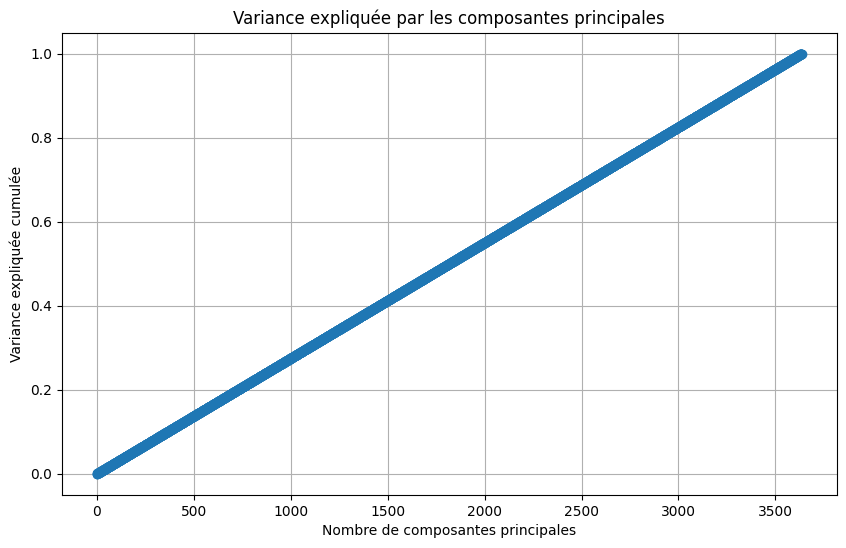

Composantes factorielles :
      Facteur 1  Facteur 2
0     -0.023586  -0.020110
1     -0.002630  -0.015280
2      0.000269   0.032128
3      0.017779  -0.009876
4      0.005048   0.000713
...         ...        ...
3630  -0.017113  -0.006057
3631  -0.009860   0.034631
3632  -0.016042   0.038467
3633  -0.001737   0.004557
3634  -0.008919   0.001335

[3635 rows x 2 columns]


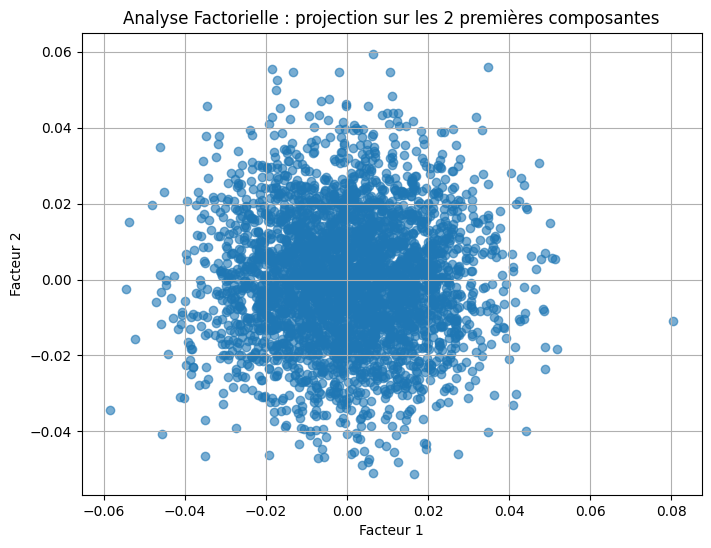

In [1]:
# Import des bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

# 1️⃣ Chargement du dataset
df = pd.read_csv("/kaggle/input/feb10-2020-kc-high-assignment/out.csv", sep=';')
print("Dimensions du DataFrame :", df.shape)
print("Types de données :")
print(df.dtypes)

# 2️⃣ Vérification des valeurs manquantes
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

# 3️⃣ Suppression des lignes avec valeurs manquantes
df = df.dropna()
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())

# 4️⃣ Identifier les colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Colonnes catégorielles :", categorical_cols)

# 5️⃣ One-Hot Encoding pour transformer les colonnes catégorielles en numériques
df = pd.get_dummies(df, columns=categorical_cols)
print("Colonnes après One-Hot Encoding :", df.columns)

# 6️⃣ Standardisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print("Données standardisées (5 premières lignes) :")
print(df_scaled[:5])

# 7️⃣ Analyse en Composantes Principales (PCA)
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# Visualisation de la variance expliquée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_.cumsum(),
         marker='o', linestyle='--')
plt.title('Variance expliquée par les composantes principales')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.grid(True)
plt.show()

# 8️⃣ Analyse factorielle classique
fa = FactorAnalysis(n_components=2)  # on choisit 2 composantes pour la visualisation
fa_components = fa.fit_transform(df_scaled)

# Affichage des composantes factorielles
print("Composantes factorielles :")
print(pd.DataFrame(fa_components, columns=['Facteur 1', 'Facteur 2']))

# 9️⃣ Visualisation des deux premières composantes factorielles
plt.figure(figsize=(8, 6))
plt.scatter(fa_components[:, 0], fa_components[:, 1], alpha=0.6)
plt.title('Analyse Factorielle : projection sur les 2 premières composantes')
plt.xlabel('Facteur 1')
plt.ylabel('Facteur 2')
plt.grid(True)
plt.show()


In [2]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 101.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spaghetti 1.7.6 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
